<a href="https://colab.research.google.com/github/AndresRivasGtz/Examen2Micro/blob/main/ExamenParcial01/Cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=np.loadtxt('/content/drive/MyDrive/base.txt', delimiter=',')

In [ ]:
dataset.shape

(333, 6)

In [ ]:
X=dataset[:,0:5]
Y=dataset[:,5]

In [ ]:
X

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00]])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X= scaler.fit_transform(X)

In [ ]:
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2)

In [ ]:
xTest.shape

(67, 5)

In [ ]:
model=Sequential()
model.add(Dense(10, input_dim=5, activation='sigmoid'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=300, batch_size=10)

Epoch 1/300
27/27 [==============================] - 2s 14ms/step - loss: 0.2258 - accuracy: 0.4436 - val_loss: 0.2270 - val_accuracy: 0.4179
Epoch 2/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.4436 - val_loss: 0.2238 - val_accuracy: 0.4179
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.4436 - val_loss: 0.2212 - val_accuracy: 0.4179
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.4436 - val_loss: 0.2186 - val_accuracy: 0.4179
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.4436 - val_loss: 0.2162 - val_accuracy: 0.4179
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.4436 - val_loss: 0.2137 - val_accuracy: 0.4179
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.4436 - val_loss: 0.2112 - val_accuracy: 0.4179
Epoch 8/300


<function matplotlib.pyplot.show(close=None, block=None)>

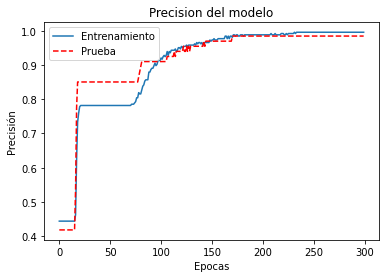

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precision del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

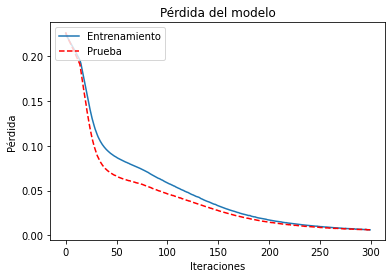

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Pérdida del modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show